<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
# Imports
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd


In [2]:
# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read CSV
df = pd.read_csv("./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")

# CHECK:
print("Columns:", df.columns.to_list())
print("---\n")
print("Shape:", df.shape)
df.head()


Columns: ['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand', 'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer', 'manufacturerNumber', 'reviews.date', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs']
---

Shape: (28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [3]:
# Drop unnecessary columns
df.drop(["id", "dateAdded", "dateUpdated", "asins", "imageURLs", 
         "reviews.didPurchase", "reviews.doRecommend", "reviews.id", 
         "reviews.numHelpful", "sourceURLs", "reviews.date", "reviews.dateSeen",
         "keys", "reviews.sourceURLs", "reviews.title"], axis = 1, inplace=True)


In [4]:
# df data types
print(df.dtypes)

# CHECK:
df.head(20)


name                  object
brand                 object
categories            object
primaryCategories     object
manufacturer          object
manufacturerNumber    object
reviews.rating         int64
reviews.text          object
reviews.username      object
dtype: object


,name,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviews.rating,reviews.text,reviews.username
0,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,3,I order 3 of them and one of the item is bad q...,Byger yang
1,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,4,Bulk is always the less expensive way to go fo...,ByMG
2,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Well they are not Duracell but for the price i...,BySharon Lambert
3,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Seem to work as well as name brand batteries a...,Bymark sexson
4,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,These batteries are very long lasting the pric...,Bylinda
5,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Bought a lot of batteries for Christmas and th...,ByPainter Marlow
6,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,ive not had any problame with these batteries ...,ByAmazon Customer
7,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Well if you are looking for cheap non-recharge...,ByLynn Pendegrass
8,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,3,These do not hold the amount of high power jui...,ByK.R.
9,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,4,AmazonBasics AA AAA batteries have done well b...,BySilverLane


In [5]:
## Creating tokens from the 'reviews.text' column

# Defining simple'tokenize' function
# def tokenize(text):
#     return [token for token in simple_preprocess(test, max_len=40) if token not in STOPWORDS]

# Sample Review
# sample = df['reviews.text'][0]
# print("Sample:\n", sample)

# TEST / CHECK:
# x = tokenize(sample)
# print(x)

In [6]:
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_numeric, stem_text
from gensim.parsing.preprocessing import strip_multiple_whitespaces, strip_non_alphanum, remove_stopwords, strip_short

# Defining 'preprocessing_filter' function
def preprocessing_filter(text):
    '''
    Cleans text for font size, whitespace,
    removing stop words, and stripping non-alpha 
    numeric characters
    '''
    # Custom Preprocessing Filter
    custom_filters = [lambda x: x.lower(),          # Lowercase
                      strip_multiple_whitespaces,   # Remove numbers
                      remove_stopwords,             # Remove stopwords
                      strip_non_alphanum,           # Remove non-alpha numeric characters
                     ]

    # TEST / CHECK: Preprocess with 'custom_filters'
    processed_text = preprocess_string(text, custom_filters)
    
    # Returning 'processed_text'
    return processed_text


In [7]:
# Creating new column for processed text and tokens via '.apply(preprocessing_filter)'
df["tokenized_reviews"] = df["reviews.text"].apply(preprocessing_filter)

# CHECK:
print(df.shape)
df.head()


(28332, 10)


,name,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviews.rating,reviews.text,reviews.username,tokenized_reviews
0,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,3,I order 3 of them and one of the item is bad q...,Byger yang,"[order, 3, item, bad, quality, missing, backup..."
1,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,4,Bulk is always the less expensive way to go fo...,ByMG,"[bulk, expensive, way, products, like]"
2,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Well they are not Duracell but for the price i...,BySharon Lambert,"[duracell, price, happy]"
3,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Seem to work as well as name brand batteries a...,Bymark sexson,"[work, brand, batteries, better, price]"
4,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,These batteries are very long lasting the pric...,Bylinda,"[batteries, long, lasting, price, great]"


In [8]:
# df.columns.to_list() for reordering
col_list = df.columns.to_list()
col_list

# Desired column order
df = df[['name',
         'brand',
         'categories',
         'primaryCategories',
         'manufacturer',
         'manufacturerNumber',
         'reviews.rating',
         'reviews.username',
         'reviews.text',
         'tokenized_reviews'
        ]]

# CHECK:
print(df.shape)
df.head()


(28332, 10)


,name,brand,categories,primaryCategories,manufacturer,manufacturerNumber,reviews.rating,reviews.username,reviews.text,tokenized_reviews
0,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,3,Byger yang,I order 3 of them and one of the item is bad q...,"[order, 3, item, bad, quality, missing, backup..."
1,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,4,ByMG,Bulk is always the less expensive way to go fo...,"[bulk, expensive, way, products, like]"
2,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,BySharon Lambert,Well they are not Duracell but for the price i...,"[duracell, price, happy]"
3,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Bymark sexson,Seem to work as well as name brand batteries a...,"[work, brand, batteries, better, price]"
4,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,HL-002619,5,Bylinda,These batteries are very long lasting the pric...,"[batteries, long, lasting, price, great]"


In [9]:
from sklearn.preprocessing import OrdinalEncoder

# Defining 'data_distributions' Function
def data_distributions(df):
    
    # Predefined column 
    cols = ['brand',
            'primaryCategories',
            'manufacturer',
            'manufacturerNumber',
            'reviews.rating'
           ]
    
    # For Loop for specified columns above
    for col in cols:
        print(col + ":", df[col].nunique())
        print("\n")
        print(df[col].value_counts(normalize=True))
        print("-----\n")

# Calling the function on the dataframe
data_distributions(df)


brand: 3


Amazon          0.570133
Amazonbasics    0.429514
AmazonBasics    0.000353
Name: brand, dtype: float64
-----

primaryCategories: 9


Electronics                    0.493964
Health & Beauty                0.426055
Toys & Games,Electronics       0.059156
Office Supplies,Electronics    0.013624
Electronics,Media              0.006530
Office Supplies                0.000318
Animals & Pet Supplies         0.000212
Electronics,Furniture          0.000071
Home & Garden                  0.000071
Name: primaryCategories, dtype: float64
-----

manufacturer: 4


Amazon                     0.569321
AmazonBasics               0.429867
Amazon Digital Services    0.000635
Amazon.com                 0.000176
Name: manufacturer, dtype: float64
-----

manufacturerNumber: 65


HL-002619           0.294473
LR6G0748FFPAB-US    0.131583
53-004485           0.086228
53-004484           0.083651
53-004754           0.059156
53-004755           0.050296
53-004683           0.042778
53-004729        

## Gensim LDA Topic Modeling

In [10]:
# 'Dictionary' Representation of all the words in our corpus
id2word = corpora.Dictionary(df["tokenized_reviews"])

# Checking the 'tokenid' for word:'price'
id2word.token2id["price"]


19

In [11]:
# Number of tokens used (before filter)
print("Number of Tokens (before filter):", len(id2word.keys()))

# Removing extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

# Number of tokens used (after filter)
print("Number of Tokens (after filter):", len(id2word.keys()))


Number of Tokens (before filter): 10365
Number of Tokens (after filter): 3916


In [12]:
# bag of words(bow) representation of our corpus
corpus = [id2word.doc2bow(text) for text in df["tokenized_reviews"]]

# CHECK:
corpus[10][:10]

[(18, 1),
 (19, 1),
 (21, 1),
 (22, 1),
 (26, 1),
 (43, 2),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1)]

In [13]:
# LDA Model
lda = LdaMulticore(corpus=corpus,       # 'corpus' = collection of written texts (tokens)
                   id2word=id2word,     # id2word = word ids
                   random_state=723812, # Reproducibility
                   num_topics=10,       # Set Number of Topics 
                   passes=10,           # Iteratively updates probabilities for the words
                   workers=12
                  )


In [14]:
# Number = Probabilistic weight of each word showing up in a given topic
lda.print_topics()


[(0,
  '0.045*"kindle" + 0.029*"love" + 0.025*"it" + 0.021*"screen" + 0.019*"size" + 0.015*"read" + 0.012*"like" + 0.012*"light" + 0.011*"tablet" + 0.011*"great"'),
 (1,
  '0.034*"great" + 0.033*"loves" + 0.029*"it" + 0.025*"tablet" + 0.022*"books" + 0.021*"kindle" + 0.020*"bought" + 0.014*"games" + 0.014*"christmas" + 0.013*"gift"'),
 (2,
  '0.047*"batteries" + 0.021*"love" + 0.017*"time" + 0.017*"i" + 0.015*"them" + 0.014*"bought" + 0.014*"like" + 0.009*"t" + 0.008*"amazon" + 0.008*"box"'),
 (3,
  '0.035*"it" + 0.029*"t" + 0.028*"tablet" + 0.025*"kids" + 0.020*"s" + 0.016*"love" + 0.013*"great" + 0.011*"use" + 0.011*"apps" + 0.010*"games"'),
 (4,
  '0.025*"battery" + 0.019*"great" + 0.017*"good" + 0.016*"life" + 0.015*"kindle" + 0.015*"screen" + 0.014*"amazon" + 0.012*"8" + 0.010*"buy" + 0.009*"tablet"'),
 (5,
  '0.046*"tablet" + 0.026*"it" + 0.025*"amazon" + 0.024*"s" + 0.018*"great" + 0.016*"good" + 0.013*"t" + 0.013*"use" + 0.010*"price" + 0.009*"ipad"'),
 (6,
  '0.067*"good" + 0.

In [15]:
# Cleaning up the words to make them more presentable, on a per topic basis
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]


In [16]:
# Seperating each word with a sapce
topics = [", ".join(t[0:10]) for t in words]


In [17]:
# Printing the Top 10 words in each topic
for id, t in enumerate(topics):
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")


------ Topic 0 ------
kindle, love, it, screen, size, read, like, light, tablet, great

------ Topic 1 ------
great, loves, it, tablet, books, kindle, bought, games, christmas, gift

------ Topic 2 ------
batteries, love, time, i, them, bought, like, t, amazon, box

------ Topic 3 ------
it, t, tablet, kids, s, love, great, use, apps, games

------ Topic 4 ------
battery, great, good, life, kindle, screen, amazon, 8, buy, tablet

------ Topic 5 ------
tablet, it, amazon, s, great, good, t, use, price, ipad

------ Topic 6 ------
good, batteries, price, t, great, work, long, buy, amazon, quality

------ Topic 7 ------
old, year, tablet, it, bought, loves, games, great, kids, 2

------ Topic 8 ------
great, easy, use, tablet, kids, love, it, kindle, apps, books

------ Topic 9 ------
great, batteries, price, use, long, brand, amazon, product, good, excellent



## **Data Analysis & Visualization**

In [18]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [19]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.204151 -0.057051       1        1  13.619895
9     -0.156257 -0.005432       2        1  12.655157
5      0.015753 -0.078944       3        1  12.506821
2     -0.127904  0.185503       4        1  10.868092
7      0.160527  0.088885       5        1  10.688984
3      0.085223  0.055718       6        1   8.781630
0      0.052869 -0.053762       7        1   8.602495
8      0.106484 -0.020112       8        1   8.163733
1      0.104439 -0.041045       9        1   7.126757
4     -0.036985 -0.073760      10        1   6.986442, topic_info=                Term         Freq        Total Category  logprob  loglift
19         batteries  5920.000000  5920.000000  Default  30.0000  30.0000
869             easy  3055.000000  3055.000000  Default  29.0000  29.0000
2074           loves  2159.000000  2159.000000  Default  28.0000  28.0000
36              good  5789.000000  5789.000000  Default  27.0000  27.0000
18             price  5192.000000  5192.000000  Default  26.0000  26.0000
2306          kindle  3237.000000  3237.000000  Default  25.0000  25.0000
2693          tablet  7290.000000  7290.000000  Default  24.0000  24.0000
108              use  4434.000000  4434.000000  Default  23.0000  23.0000
22             great  9252.000000  9252.000000  Default  22.0000  22.0000
119             year  1835.000000  1835.000000  Default  21.0000  21.0000
604              old  2191.000000  2191.000000  Default  20.0000  20.0000
199               it  6064.000000  6064.000000  Default  19.0000  19.0000
215             kids  2605.000000  2605.000000  Default  18.0000  18.0000
102             love  3925.000000  3925.000000  Default  17.0000  17.0000
3            battery  1895.000000  1895.000000  Default  16.0000  16.0000
2319           books  1498.000000  1498.000000  Default  15.0000  15.0000
43                 t  4505.000000  4505.000000  Default  14.0000  14.0000
753            games  1807.000000  1807.000000  Default  13.0000  13.0000
1881          screen  1937.000000  1937.000000  Default  12.0000  12.0000
30            bought  3303.000000  3303.000000  Default  11.0000  11.0000
24              long  2089.000000  2089.000000  Default  10.0000  10.0000
901             read  1316.000000  1316.000000  Default   9.0000   9.0000
21             brand   970.000000   970.000000  Default   8.0000   8.0000
145             size  1130.000000  1130.000000  Default   7.0000   7.0000
64              life   943.000000   943.000000  Default   6.0000   6.0000
10              work  1959.000000  1959.000000  Default   5.0000   5.0000
1079         reading  1309.000000  1309.000000  Default   4.0000   4.0000
1009            gift  1096.000000  1096.000000  Default   3.0000   3.0000
1434        daughter   964.000000   964.000000  Default   2.0000   2.0000
98              them   860.000000   860.000000  Default   1.0000   1.0000
2917        accident    19.998177    20.895510   Topic1  -7.7906   1.9497
3097        commands    27.402782    28.831669   Topic1  -7.4756   1.9428
3860            prob    18.432583    19.438541   Topic1  -7.8722   1.9405
2782     substantial    19.605951    20.743383   Topic1  -7.8104   1.9372
2708          frozen    13.410734    14.277018   Topic1  -8.1902   1.9310
1086           cells    21.433651    22.855080   Topic1  -7.7213   1.9294
2658            wire    13.942560    14.908356   Topic1  -8.1513   1.9267
2478            wake    13.492586    14.445222   Topic1  -8.1841   1.9254
1272        fabulous    17.192575    18.422132   Topic1  -7.9418   1.9246
774          lithium    16.278847    17.461765   Topic1  -7.9964   1.9235
1479       providing    16.809128    18.096212   Topic1  -7.9644   1.9199
136          duracel    16.005568    17.312731   Topic1  -8.0133   1.9151
1521          frills    10.810867    11.731356   Topic1  -8.4057   1.9119
2915           silly    10.176645    11.063312   Topi

In [20]:
dist = [lda[d] for d in corpus]

# Fill-in missing values from distribution as 0
def update(text):
    d_dist = {k:0 for k in range(0,10)}
    for t in text:
        d_dist[t[0]] = t[1]
    return d_dist

new_dist = [update(d) for d in dist]

In [21]:
# Adding the distribution to the dataframe via Top 10 words as a proxy for the topic 
categories = [i for i in df["primaryCategories"]]

df_new = pd.DataFrame.from_records(new_dist, index=categories)
df_new.columns = topics
df_new["categories"] = categories

df_new.head()


,"kindle, love, it, screen, size, read, like, light, tablet, great","great, loves, it, tablet, books, kindle, bought, games, christmas, gift","batteries, love, time, i, them, bought, like, t, amazon, box","it, t, tablet, kids, s, love, great, use, apps, games","battery, great, good, life, kindle, screen, amazon, 8, buy, tablet","tablet, it, amazon, s, great, good, t, use, price, ipad","good, batteries, price, t, great, work, long, buy, amazon, quality","old, year, tablet, it, bought, loves, games, great, kids, 2","great, easy, use, tablet, kids, love, it, kindle, apps, books","great, batteries, price, use, long, brand, amazon, product, good, excellent",categories
Health & Beauty,0.000000,0.150024,0.333855,0.000000,0.195799,0.000000,0.270257,0.000000,0.000000,0.000000,Health & Beauty
Health & Beauty,0.016671,0.016671,0.016672,0.016672,0.016672,0.016671,0.849956,0.016671,0.016670,0.016675,Health & Beauty
Health & Beauty,0.025003,0.211950,0.025007,0.025003,0.025010,0.025003,0.025009,0.025004,0.025001,0.588009,Health & Beauty
Health & Beauty,0.016668,0.016669,0.016669,0.016667,0.016668,0.016668,0.016674,0.016668,0.016667,0.849982,Health & Beauty
Health & Beauty,0.016667,0.016668,0.016669,0.016667,0.016668,0.016668,0.016675,0.016667,0.016668,0.849983,Health & Beauty


In [24]:
df_new.groupby("categories").mean()


,"kindle, love, it, screen, size, read, like, light, tablet, great","great, loves, it, tablet, books, kindle, bought, games, christmas, gift","batteries, love, time, i, them, bought, like, t, amazon, box","it, t, tablet, kids, s, love, great, use, apps, games","battery, great, good, life, kindle, screen, amazon, 8, buy, tablet","tablet, it, amazon, s, great, good, t, use, price, ipad","good, batteries, price, t, great, work, long, buy, amazon, quality","old, year, tablet, it, bought, loves, games, great, kids, 2","great, easy, use, tablet, kids, love, it, kindle, apps, books","great, batteries, price, use, long, brand, amazon, product, good, excellent"
categories,,,,,,,,,,
Animals & Pet Supplies,0.047545,0.038896,0.101954,0.263008,0.053453,0.037561,0.141111,0.007781,0.077915,0.207422
Electronics,0.114006,0.121513,0.037129,0.090462,0.065532,0.143084,0.072527,0.140078,0.148725,0.042666
"Electronics,Furniture",0.000000,0.000000,0.000000,0.190216,0.104890,0.180845,0.146836,0.000000,0.337169,0.000000
"Electronics,Media",0.446647,0.061902,0.048379,0.034442,0.166701,0.029242,0.040257,0.026388,0.074423,0.048851
Health & Beauty,0.028358,0.024448,0.165867,0.026135,0.046552,0.026934,0.344079,0.022971,0.036888,0.264840
Home & Garden,0.222841,0.031266,0.031261,0.031264,0.031261,0.031260,0.277109,0.031262,0.281214,0.031260
Office Supplies,0.085368,0.053350,0.021164,0.133233,0.277311,0.021166,0.203935,0.096828,0.044325,0.063319
"Office Supplies,Electronics",0.279161,0.120008,0.031032,0.049937,0.113210,0.111507,0.050627,0.042643,0.136273,0.041313
"Toys & Games,Electronics",0.031209,0.092239,0.044992,0.176366,0.035309,0.053836,0.036524,0.320099,0.159999,0.022951


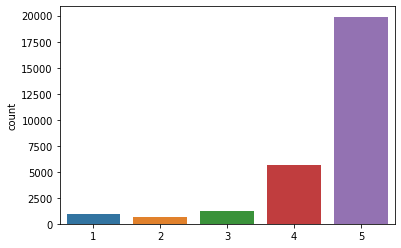

In [23]:
import seaborn as sns

ratings = df["reviews.rating"].to_list()

sns.countplot(ratings);

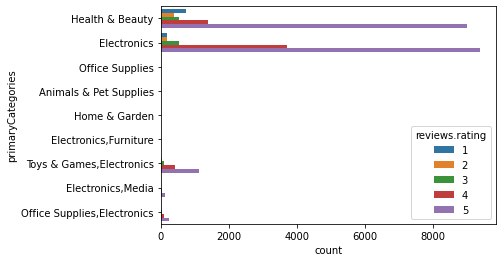

In [40]:
sns.countplot(y="primaryCategories", hue="reviews.rating", data=df);

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling